# Exploratory Data Analysis

## Librerias

In [1]:
# EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud,STOPWORDS
import re


warnings.filterwarnings('ignore')

## Leer Datos

In [25]:
df = pd.read_excel('../dataset_2023.xlsx')
# df = pd.read_excel('dataset_2023.xlsx')
# df["Descripcion"] = df["Descripcion"].fillna("")
df.shape

(46367, 18)

In [4]:
df["Descripcion"] = df["Descripcion"].fillna("")

In [5]:
df.head()

,Tipo comp.,NÂ° cuenta,Desc. Cuenta,NÂ° TesorerÃ­a,Desc. TesorerÃ­a,NÂ° Entidad,Desc. Entidad,Tipo Pres.,Tipo Reg.,Clase Reg.,Cod.,Fte. Fin.,Cuit,Beneficiario,Descripcion,Tipo cta,Cod. Bco.,Class
0,AF,360000003873122,SGP-RENTAS GRALES-PAGADORA ...,1,TESORERIA GENERAL DE LA PROVINCIA,50,SAF OBLIGACIONES A CARGO DEL TESORO,E,ANT,,229,10,30517999551,CAJA POPULAR DE AHORROS DE LA PROVINCIA DE TUC...,AFR-PLAN DE OBRAS- EQUIPAMIENTOS Y SERVICIOS 2022,R,7,ANR
1,AF,71111333,SGP - CTA PAGADORA- CHEQUES DIFERIDOS ...,1,TESORERIA GENERAL DE LA PROVINCIA,50,SAF OBLIGACIONES A CARGO DEL TESORO,E,ANT,,229,10,30517999551,CAJA POPULAR DE AHORROS DE LA PROVINCIA DE TUC...,D-312-ME-22-FONDOS P-EROGACIONES PLAN OBRAS,P,7,PTE
2,AF,71111333,SGP - CTA PAGADORA- CHEQUES DIFERIDOS ...,1,TESORERIA GENERAL DE LA PROVINCIA,50,SAF OBLIGACIONES A CARGO DEL TESORO,E,ANT,,229,10,30517999551,CAJA POPULAR DE AHORROS DE LA PROVINCIA DE TUC...,AFR-PLAN DE OBRAS-EQUIPAMIENTO Y SERVICIOS 202...,P,7,PTE
3,AF,360000003873122,SGP-RENTAS GRALES-PAGADORA ...,1,TESORERIA GENERAL DE LA PROVINCIA,50,SAF OBLIGACIONES A CARGO DEL TESORO,E,ANT,,225,10,30709059951,CPA FDO- FID- MUNI- LULES,DCTO N-119-SH-22-AFR-PGO HAB-ASIG-FLIAR ENE-22...,R,7,Sueldos
4,AF,360000003873122,SGP-RENTAS GRALES-PAGADORA ...,1,TESORERIA GENERAL DE LA PROVINCIA,50,SAF OBLIGACIONES A CARGO DEL TESORO,E,ANT,,225,10,33709060029,CPA FDO- FID- MUNI- CONCEPCION,DCTO N-120-SH-22-AFR-PGO HAB-ASIG-FLIAR ENE-22...,R,7,Sueldos


In [6]:
df.sample(5)

,Tipo comp.,NÂ° cuenta,Desc. Cuenta,NÂ° TesorerÃ­a,Desc. TesorerÃ­a,NÂ° Entidad,Desc. Entidad,Tipo Pres.,Tipo Reg.,Clase Reg.,Cod.,Fte. Fin.,Cuit,Beneficiario,Descripcion,Tipo cta,Cod. Bco.,Class
39546,GE,360000003873122,SGP-RENTAS GRALES-PAGADORA ...,1,TESORERIA GENERAL DE LA PROVINCIA,12,SAF MI DIRECCION DE ADM- MINIST- DE INTERIOR,E,PAG,,391,10,323,SECRET-DE ESTADO DE COORDINACION CON MUNICIPIO...,RES- 528-10 CTA- 97426-2 ADIC- LEY 9499 2- SAC...,R,7,Sueldos
5741,GC,360000003873122,SGP-RENTAS GRALES-PAGADORA ...,1,TESORERIA GENERAL DE LA PROVINCIA,22,SAF MOSP DPTO S-ADM-FIN-DIR- ARQ- Y URBANISMO,P,ORD,OGA,0,10,20397298508,RODRIGUEZ LUCAS GABRIEL,A85-F-1-6-CTA-362809420596249-01-01 A 01-02-R-...,R,7,PV
17860,GC,360000003873122,SGP-RENTAS GRALES-PAGADORA ...,1,TESORERIA GENERAL DE LA PROVINCIA,12,SAF MI DIRECCION DE ADM- MINIST- DE INTERIOR,P,ORD,OGA,0,10,33715109099,TODOLANDIA S-R-L-,N-96 N-FACT01129264 N-CTA3600003818039 ART LIB...,R,7,PV
24477,GC,360000003873122,SGP-RENTAS GRALES-PAGADORA ...,1,TESORERIA GENERAL DE LA PROVINCIA,7,SAF GSGG DIR-A Y D SEC-E-COMUNICACION PUBLICA,P,ORD,OGA,0,10,27244329263,GEREZ NATALIA VANESA,R-N- 3288-1 - GEREZ - F-N- 14 - C-N- 360094203303,R,7,Prensa
35166,GE,360000003873122,SGP-RENTAS GRALES-PAGADORA ...,1,TESORERIA GENERAL DE LA PROVINCIA,36,SAF MED SEC E- GEST A-MINISTERIO DE EDUCACION,E,PAG,,392,10,329,MINISTERIO DE EDUCACION,AY SOC D-N-4271-5 MED DOC Y P AUX EST G PRV C3...,R,7,Transferencias rep


In [7]:
df.tail(5)

,Tipo comp.,NÂ° cuenta,Desc. Cuenta,NÂ° TesorerÃ­a,Desc. TesorerÃ­a,NÂ° Entidad,Desc. Entidad,Tipo Pres.,Tipo Reg.,Clase Reg.,Cod.,Fte. Fin.,Cuit,Beneficiario,Descripcion,Tipo cta,Cod. Bco.,Class
46362,GE,360000003873122,SGP-RENTAS GRALES-PAGADORA ...,1,TESORERIA GENERAL DE LA PROVINCIA,19,SAF ME DEP SERV- ADM- FIN-DIR-GRAL- DE RENTAS,E,PAG,,391,10,490,DIRECCION GENERAL DE RENTAS,LEY RI 2100-23 CTA 360000200973511 LEY 7991 CA...,R,7,Sueldos
46363,GE,360000003873122,SGP-RENTAS GRALES-PAGADORA ...,1,TESORERIA GENERAL DE LA PROVINCIA,19,SAF ME DEP SERV- ADM- FIN-DIR-GRAL- DE RENTAS,E,PAG,,391,10,490,DIRECCION GENERAL DE RENTAS,LEY RI 2099-23 CTA 360000200973511 LEY 7991 DG...,R,7,Sueldos
46364,GE,360000003873122,SGP-RENTAS GRALES-PAGADORA ...,1,TESORERIA GENERAL DE LA PROVINCIA,18,SAF ME DIR- ADM- MINISTERIO DE ECONOMIA,E,PAG,,391,10,530,DIRECCION GENERAL DE CATASTRO,R-3887-DGC-23-LEY 7991 NOV 2023 - CTA 36000020...,R,7,Sueldos
46365,GE,360000003873122,SGP-RENTAS GRALES-PAGADORA ...,1,TESORERIA GENERAL DE LA PROVINCIA,6,SAF GSGG DIR-ADM Y D- REP-OFIC DE PROV CA- F-,E,PAG,,391,10,80,REPRESENTACION OFICIAL DE LA PROVINCIA EN CAPI...,RES-359-RO-LEY7991-HABERES DIC-3 CTA 789009,R,7,Sueldos
46366,GE,360000003873122,SGP-RENTAS GRALES-PAGADORA ...,1,TESORERIA GENERAL DE LA PROVINCIA,36,SAF MED SEC E- GEST A-MINISTERIO DE EDUCACION,E,PAG,,391,10,329,MINISTERIO DE EDUCACION,LEY 7991 HAB DIC-23 R173 C- 360000200983222,R,7,Sueldos


In [27]:
df.isna().sum()

Tipo comp.          0
NÂ° cuenta          0
Desc. Cuenta        0
NÂ° TesorerÃ­a      0
Desc. TesorerÃ­a    0
NÂ° Entidad         0
Desc. Entidad       0
Tipo Pres.          0
Tipo Reg.           0
Clase Reg.          0
Cod.                0
Fte. Fin.           0
Cuit                0
Beneficiario        0
Descripcion         1
Tipo cta            0
Cod. Bco.           0
Class               0
dtype: int64

In [8]:
def limpiar_texto(texto):
    texto = texto.upper()
    texto = re.findall(r"[A-Z0-9]{3,}", texto)
    texto = " ".join(texto).strip()
    return texto

df["Descripcion"] = df["Descripcion"].apply(limpiar_texto)

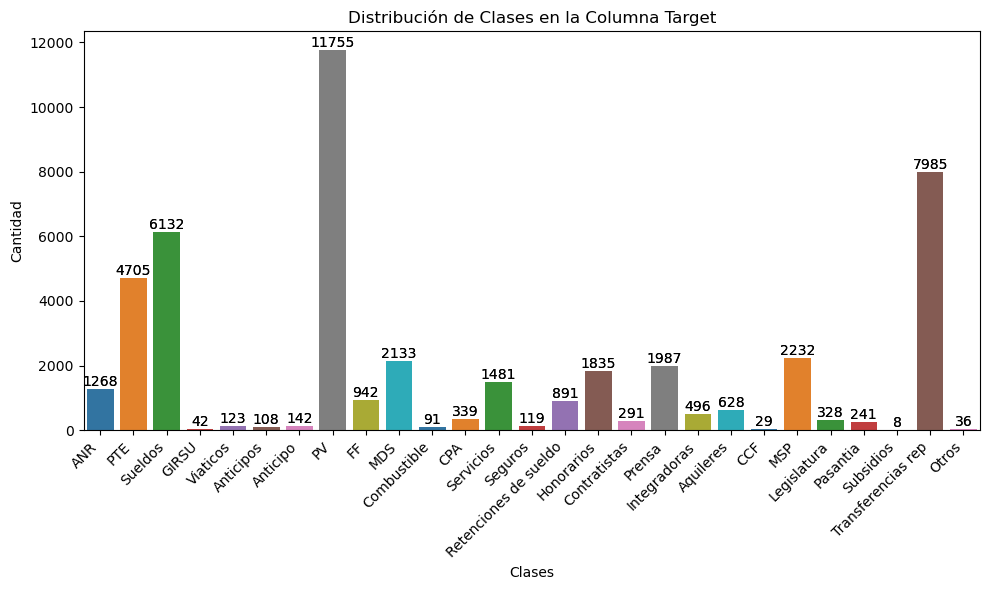

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Class', data=df)
# Add color for each category
colors = sns.color_palette("tab10")
ax = sns.countplot(x='Class', data=df, palette=colors)

plt.title('Distribución de Clases en la Columna Target')
plt.xlabel('Clases')
plt.ylabel('Cantidad')

# Añadir etiquetas de cantidad sobre cada barra
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### WordCloud

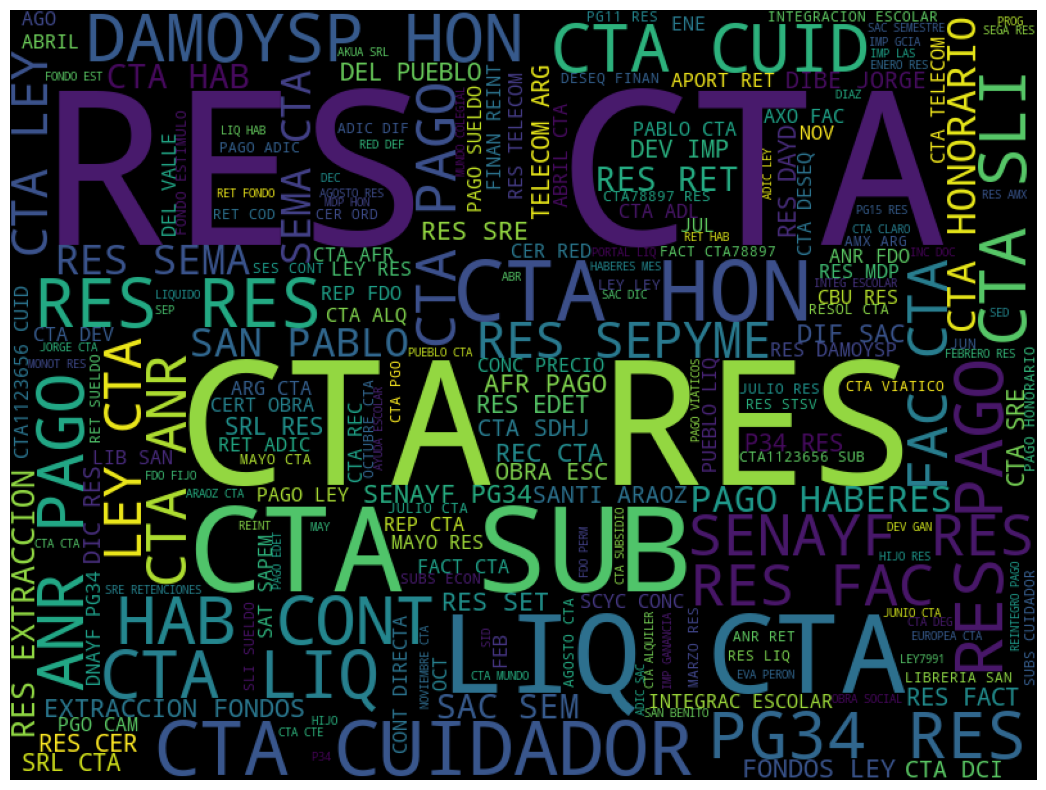

In [18]:
wc = WordCloud(' '.join(df['Descripcion']))
def cloud(data, backgroundcolor = 'black', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(df['Descripcion']))

#### Longitud de descripciones

In [9]:
df['text_size'] = df['Descripcion'].str.len()
df['text_size'].describe()

count    46367.000000
mean        41.789980
std          8.437751
min          0.000000
25%         36.000000
50%         43.000000
75%         48.000000
max         60.000000
Name: text_size, dtype: float64

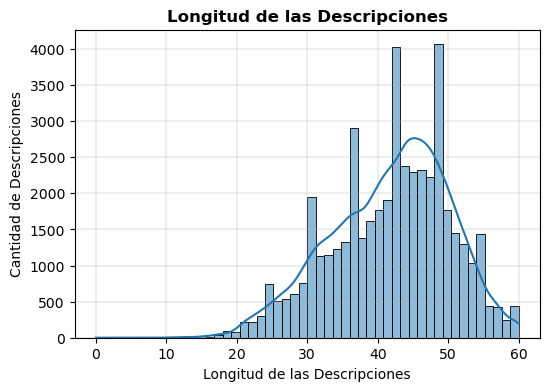

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot(df['text_size'], kde=True, bins=50)
plt.title('Longitud de las Descripciones', fontdict={'fontsize': 12,'fontweight':'bold'})
plt.ylabel('Cantidad de Descripciones')
plt.xlabel('Longitud de las Descripciones')
plt.grid(linewidth=0.3)
plt.show()

In [11]:
df['text_words_count'] = df['Descripcion'].apply(lambda x: len(x.split()))  
df['text_words_count'].describe()

count    46367.000000
mean         6.576682
std          1.457556
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         14.000000
Name: text_words_count, dtype: float64

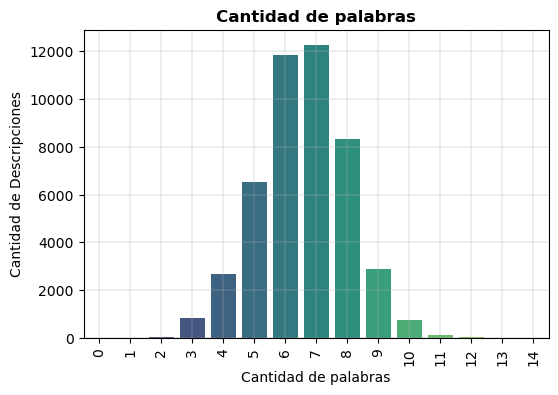

In [17]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['text_words_count'].value_counts().index, y=df['text_words_count'].value_counts().values, palette='viridis')
plt.title('Cantidad de palabras', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Cantidad de Descripciones')
plt.xlabel('Cantidad de palabras')
plt.grid(linewidth=0.3)
plt.xticks(rotation=90)  # Rotar las etiquetas si hay muchas categorías
plt.show()


#### Frecuencia de palabras según target

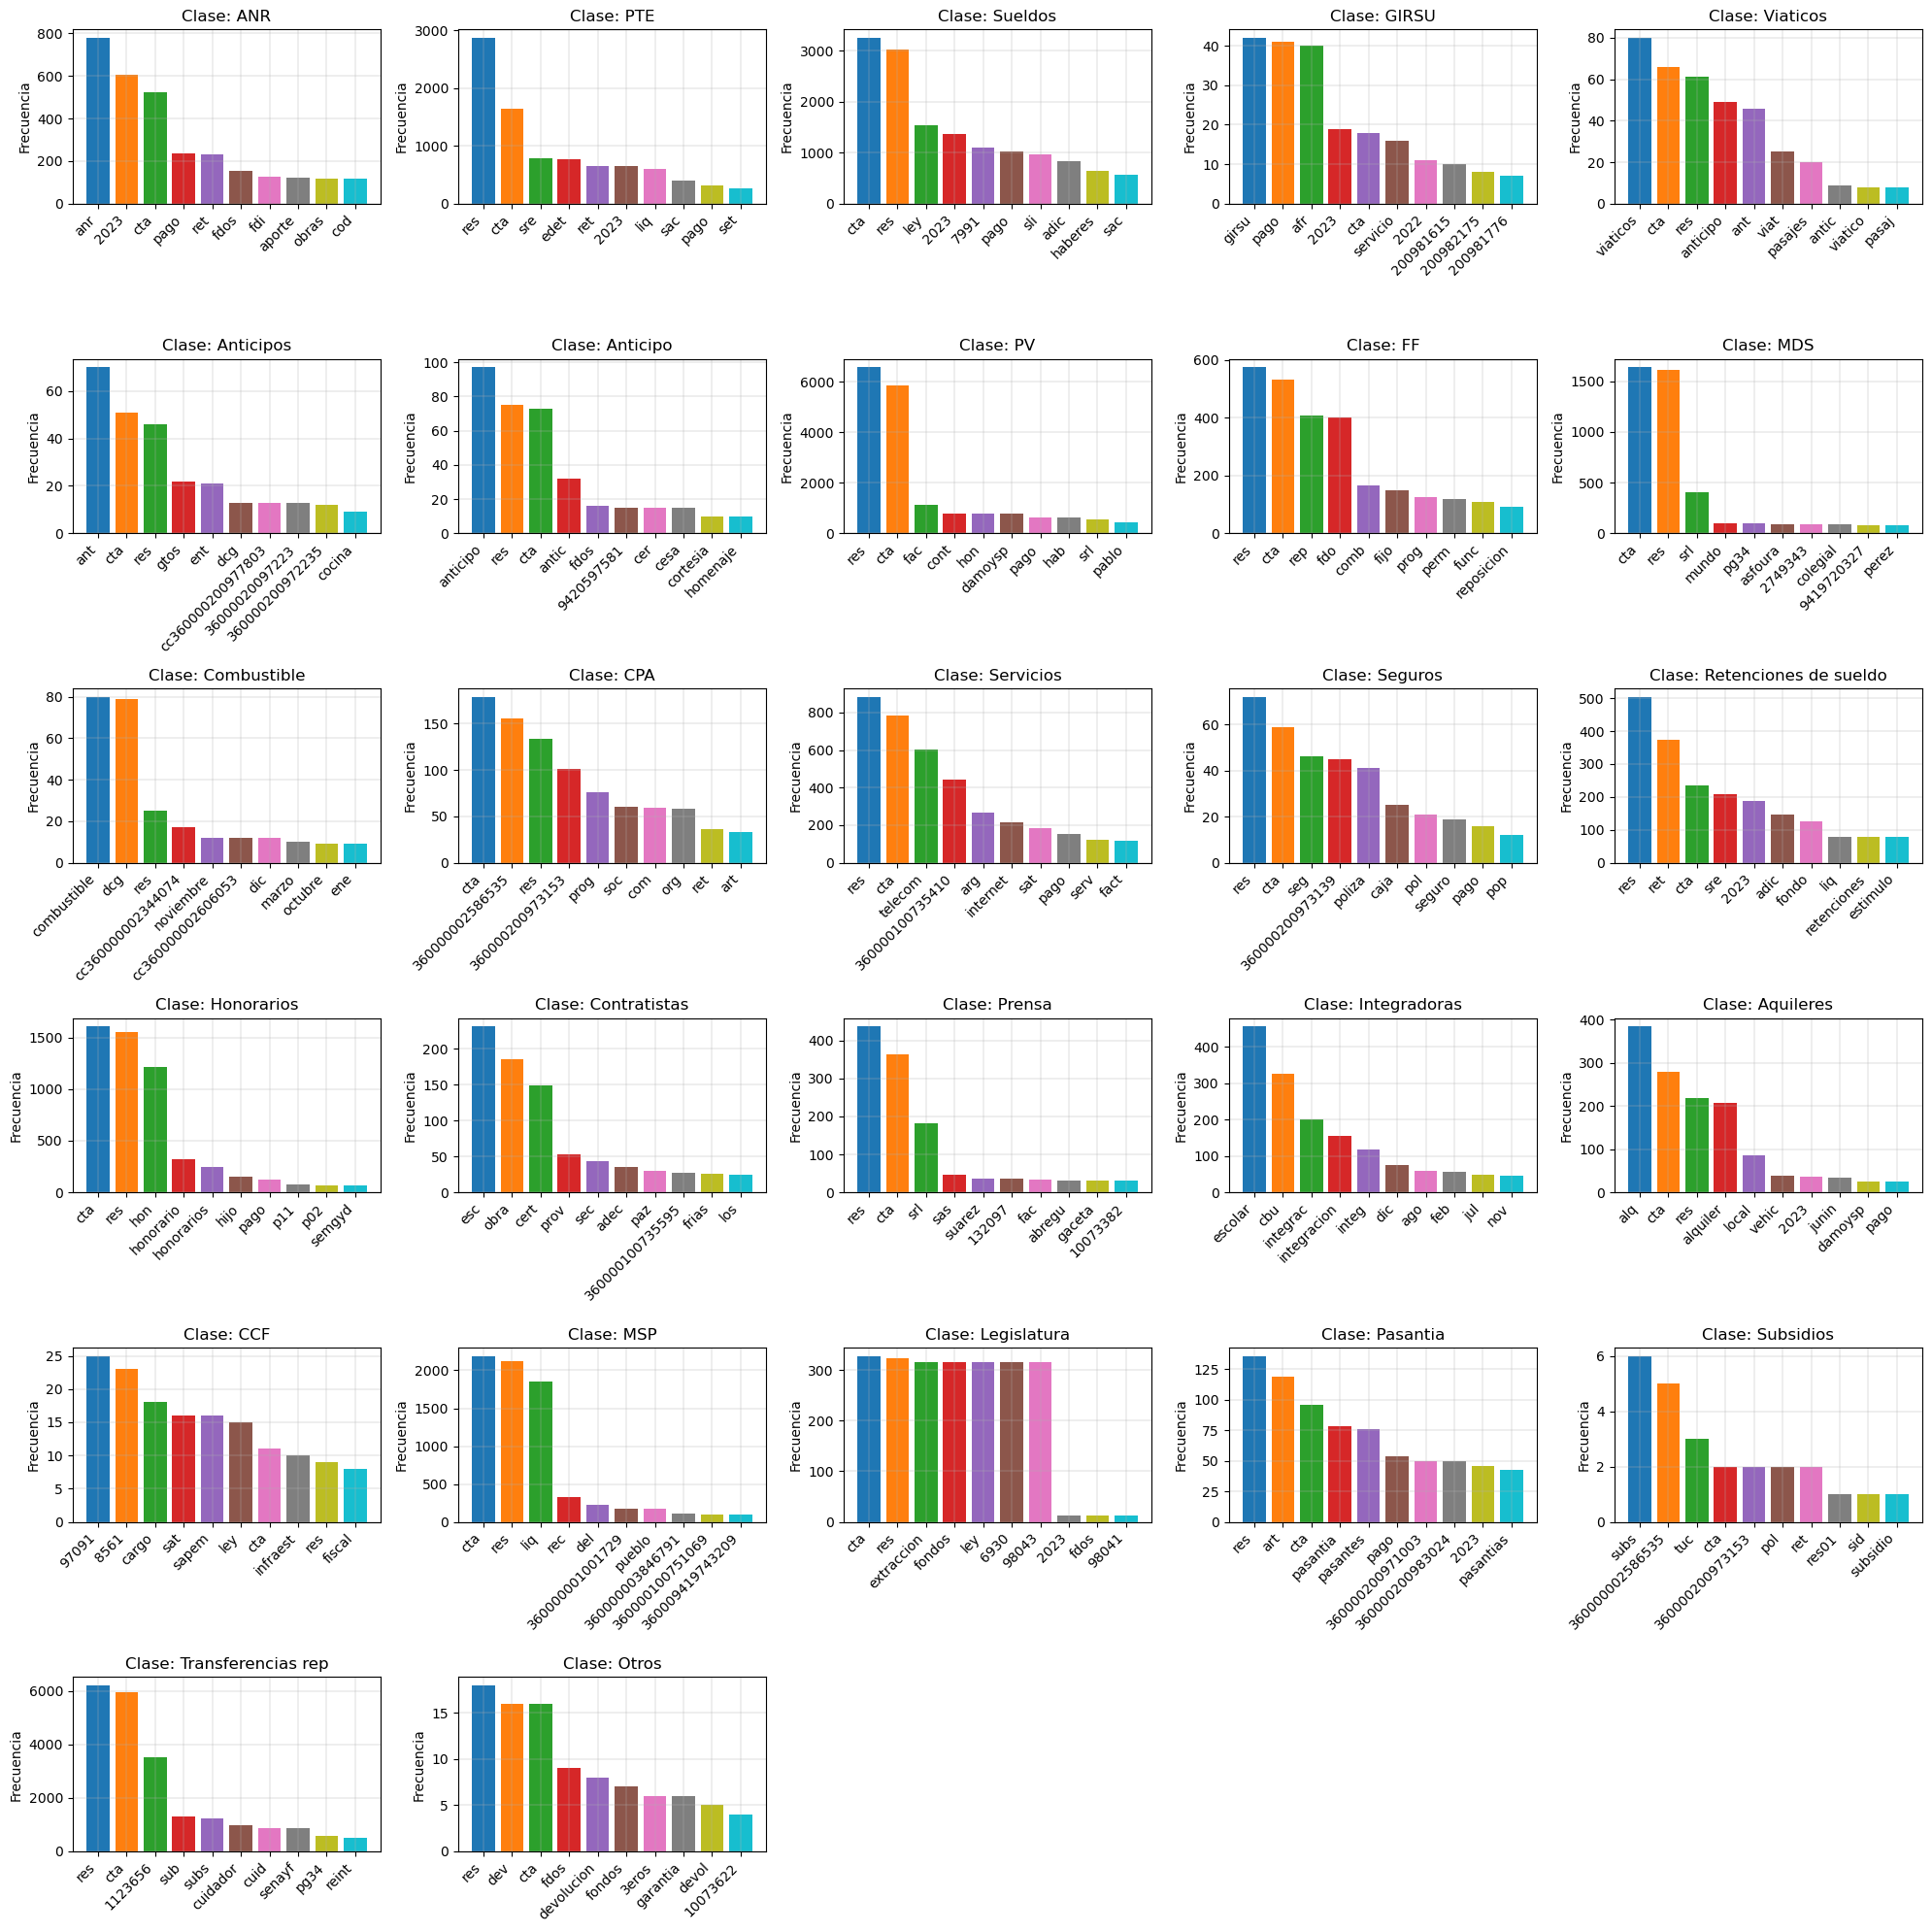

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Configurar el layout de la grilla, ajustando a solo 27 subplots (5 filas x 5 columnas)
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
axes = axes.flatten()  # Convertir la grilla en una lista
colors = sns.color_palette("tab10")

# Iterar sobre cada clase en "Class"
for i, class_value in enumerate(df['Class'].unique()):
    if i >= 27:  # Evitar subplots adicionales si hay más de 27 clases
        break
    
    # Combinar el texto para la clase actual
    combined_text = ' '.join(df[df['Class'] == class_value]['Descripcion'].astype(str))
    
    # Tokenizar el texto en palabras
    tokens = word_tokenize(combined_text.lower())  # Convertir a minúsculas
    
    # Crear la distribución de frecuencias
    fdist = FreqDist(tokens)
    
    # Tomar las 10 palabras más comunes
    most_common_words = fdist.most_common(10)
    
    # Separar las palabras y sus frecuencias para graficar
    words, counts = zip(*most_common_words)
    
    # Graficar en la posición correspondiente de la grilla
    ax = axes[i]
    ax.bar(words, counts, color=colors)
    ax.set_title(f"Clase: {class_value}", fontsize=12)
    ax.set_xticklabels(words, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel('Frecuencia')
    ax.grid(linewidth=0.3)

# Eliminar los subplots vacíos (28, 29 y 30)
for j in range(27, 30):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


#### Word2Vect: Distacia entre palabras más frecuentes

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preparar las oraciones como listas de palabras
sentences = [row.split() for row in df['texto_limpio']]

# Entrenar el modelo Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Obtener los vectores de las palabras
words = list(model.wv.index_to_key)

# Seleccionar las 20 palabras más frecuentes
top_words = words[:20]
X = model.wv[top_words]

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Graficar
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])

# Anotar solo las palabras seleccionadas en el gráfico
for i, word in enumerate(top_words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title('Visualización en 2D de las 20 palabras más frecuentes')
plt.show()


#### Word2Vect: Distacia entre palabras más frecuentes por clase